In [24]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from plyfile import PlyData, PlyElement
from mpl_toolkits.mplot3d import Axes3D

In [25]:
def info_ply(ply_path):
    ply_data=PlyData.read(ply_path)
    # print("header for ply data:")
    # print(ply_data.header)
    xyz = np.stack((np.asarray(ply_data.elements[0]["x"]),
                np.asarray(ply_data.elements[0]["y"]),
                np.asarray(ply_data.elements[0]["z"])),  axis=1)
    print("xyz shape:",xyz.shape)
    print("max point:",xyz.max(axis=0))
    print("min point:",xyz.min(axis=0))

    return xyz

In [26]:
fox_path="./model/fox-trained/point_cloud/iteration_30000/point_cloud.ply"
fox_data=PlyData.read(fox_path)
print("header for fox_data:")
print(fox_data.header)

header for fox_data:
ply
format binary_little_endian 1.0
element vertex 281808
property float x
property float y
property float z
property float nx
property float ny
property float nz
property float f_dc_0
property float f_dc_1
property float f_dc_2
property float f_rest_0
property float f_rest_1
property float f_rest_2
property float f_rest_3
property float f_rest_4
property float f_rest_5
property float f_rest_6
property float f_rest_7
property float f_rest_8
property float f_rest_9
property float f_rest_10
property float f_rest_11
property float f_rest_12
property float f_rest_13
property float f_rest_14
property float f_rest_15
property float f_rest_16
property float f_rest_17
property float f_rest_18
property float f_rest_19
property float f_rest_20
property float f_rest_21
property float f_rest_22
property float f_rest_23
property float f_rest_24
property float f_rest_25
property float f_rest_26
property float f_rest_27
property float f_rest_28
property float f_rest_29
property f

fox_opacity shape: (281808,)


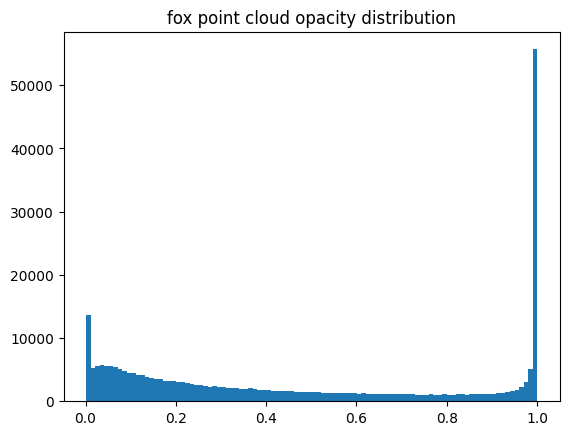

In [27]:
fox_opacity=fox_data.elements[0]["opacity"]
fox_opacity=np.asarray(fox_opacity)
print("fox_opacity shape:",fox_opacity.shape)
#对opacity进行sigmoid激活
fox_opacity=torch.tensor(fox_opacity)
fox_opacity=torch.sigmoid(fox_opacity)
fox_opacity=fox_opacity.numpy()
#做出点云的透明度分布
plt.title("fox point cloud opacity distribution")
plt.hist(fox_opacity,bins=100)
plt.show()

In [28]:
fox_xyz=info_ply(fox_path)

xyz shape: (281808, 3)
max point: [4.471855  5.3747134 9.232765 ]
min point: [-4.9476657 -6.3473897 -7.4066925]


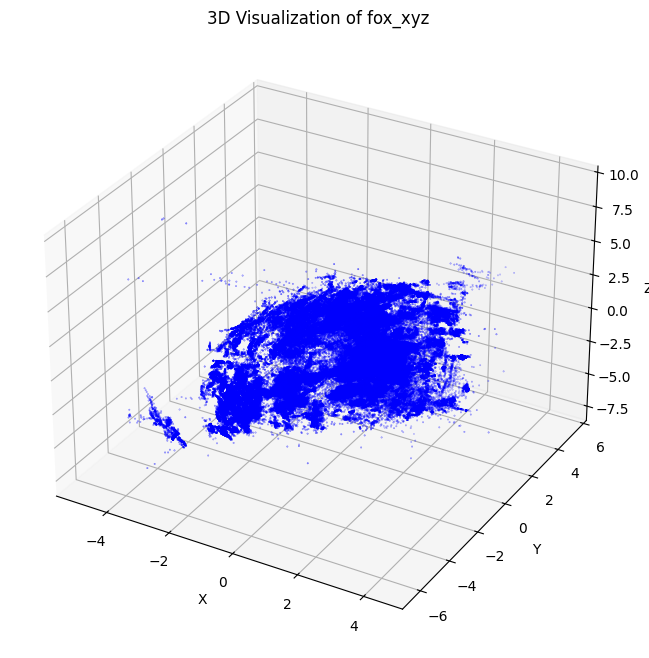

In [29]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(fox_xyz[:, 0], fox_xyz[:, 1], fox_xyz[:, 2], s=0.1,c='b', marker='o')

ax.set_title('3D Visualization of fox_xyz')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [30]:
# 定义旋转角度（20度）并转换为弧度
theta = np.radians(20)

# 定义旋转矩阵
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]
])

# 对 fox_xyz 进行旋转
fox_xyz_rotated = np.dot(fox_xyz, rotation_matrix.T)

print("Rotated fox_xyz shape:", fox_xyz_rotated.shape)
print("First 5 points of rotated fox_xyz:\n", fox_xyz_rotated[:5])

Rotated fox_xyz shape: (281808, 3)
First 5 points of rotated fox_xyz:
 [[-0.48276134  0.91348023  1.2208463 ]
 [-0.13265808  1.14912306 -1.11906028]
 [-0.60258368 -1.53189232  0.90582561]
 [ 0.3652563   1.19994524  1.28301263]
 [ 0.8114748   0.18590011  0.72240376]]


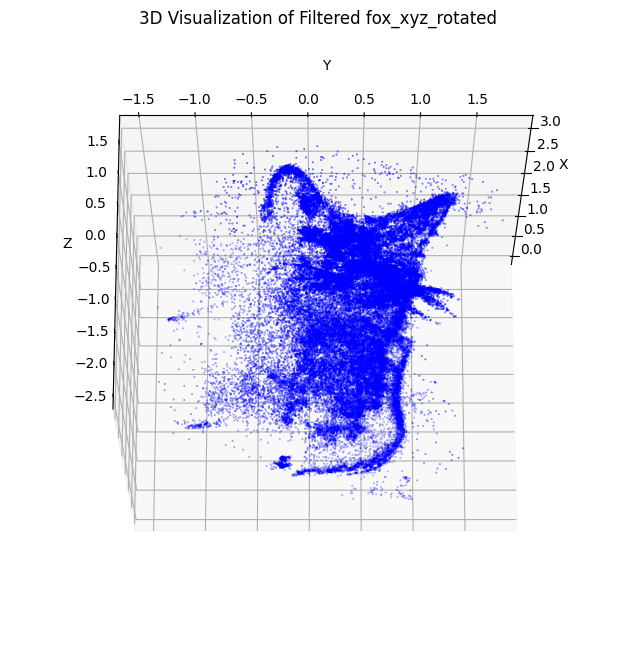

In [34]:


# 定义边界
point_min = np.array([0.3, -1.67, -2.4])
point_max = np.array([2.857, 0.86, 1.65])

# 筛选位于边界内的点
mask = np.all((fox_xyz_rotated >= point_min) & (fox_xyz_rotated <= point_max), axis=1)
filtered_points = fox_xyz_rotated[mask]

# #对变换后的点再沿x轴旋转20度
# theta = np.radians(-100)
# rotation_matrix = np.array([
#     [1, 0, 0],
#     [0, np.cos(theta), -np.sin(theta)],
#     [0, np.sin(theta), np.cos(theta)]
# ])
filtered_points = np.dot(filtered_points, rotation_matrix.T)
# 绘制筛选后的点
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(filtered_points[:, 0], filtered_points[:, 1], filtered_points[:, 2], s=0.1, c='b', marker='o')

ax.set_title('3D Visualization of Filtered fox_xyz_rotated')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(elev=-20, azim=0)
plt.show()